## Stratified K-Fold Cross Validation (OOP)

In [4]:
import os
import sys
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, LSTM
from src.k_fold.stratified_k_fold import KFoldModelTrainer
from src.processing import data_augmentation

In [3]:
sys.path.append('/home/bilgecan_cihan/audio-predictive-maintenance/data_science')
os.environ["CUDA_VISIBLE_DEVICES"] = "1"

In [5]:
# generate LSTM model
model = Sequential()
model.add(LSTM(128, input_shape=(173, 40)))  # (X_train.shape[1], X_train.shape[2])
model.add(Dropout(0.2))
model.add(Dense(128, activation="relu"))
model.add(Dropout(0.2))
model.add(Dense(10, activation="softmax"))

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 128)               86528     
_________________________________________________________________
dropout (Dropout)            (None, 128)               0         
_________________________________________________________________
dense (Dense)                (None, 128)               16512     
_________________________________________________________________
dropout_1 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1290      
Total params: 104,330
Trainable params: 104,330
Non-trainable params: 0
_________________________________________________________________


In [6]:
# load processed data and initialize kf object
kf = KFoldModelTrainer(fold=5)

/home/bilgecan_cihan/.local/lib/python3.6/site-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


In [7]:
# investigate total samples at each fold
kf.create_kfold_data(input_RNN=True)

> Fold 1, Train: 0=798, 1=162, 2=780, 3=540, 4=644, 5=768, 6=13, 7=644, 8=718, 9=800,                  
  Fold 1, Test: 0=199, 1=41, 2=196, 3=135, 4=161, 5=193, 6=3, 7=160, 8=179, 9=200

> Fold 2, Train: 0=797, 1=162, 2=781, 3=540, 4=644, 5=769, 6=13, 7=643, 8=718, 9=800,                  
  Fold 2, Test: 0=200, 1=41, 2=195, 3=135, 4=161, 5=192, 6=3, 7=161, 8=179, 9=200

> Fold 3, Train: 0=797, 1=162, 2=781, 3=540, 4=644, 5=769, 6=13, 7=643, 8=718, 9=800,                  
  Fold 3, Test: 0=200, 1=41, 2=195, 3=135, 4=161, 5=192, 6=3, 7=161, 8=179, 9=200

> Fold 4, Train: 0=798, 1=163, 2=781, 3=540, 4=644, 5=769, 6=12, 7=643, 8=717, 9=800,                  
  Fold 4, Test: 0=199, 1=40, 2=195, 3=135, 4=161, 5=192, 6=4, 7=161, 8=180, 9=200

> Fold 5, Train: 0=798, 1=163, 2=781, 3=540, 4=644, 5=769, 6=13, 7=643, 8=717, 9=800,                  
  Fold 5, Test: 0=199, 1=40, 2=195, 3=135, 4=161, 5=192, 6=3, 7=161, 8=180, 9=200



In [8]:
# generate a dictionary with all folds and compile
kf.initialize_model(model)

In [9]:
# start training
kf.train_models(input_RNN=True,
                batch_size=256,
                epochs=1000,
                patience=50,
                early_stop=True,
                data_augmentation_function=data_augmentation.apply_masking_batch)

------------------------------------------------------------------------
Training for fold 1 ...
Epoch 1/1000
46/46 [==============================] - 1s 30ms/step - loss: 1.9373 - accuracy: 0.2778 - val_loss: 1.5485 - val_accuracy: 0.4601
Epoch 2/1000
46/46 [==============================] - 1s 21ms/step - loss: 1.5502 - accuracy: 0.4388 - val_loss: 1.2655 - val_accuracy: 0.5842
Epoch 3/1000
46/46 [==============================] - 1s 22ms/step - loss: 1.3410 - accuracy: 0.5259 - val_loss: 1.0973 - val_accuracy: 0.6449
Epoch 4/1000
46/46 [==============================] - 1s 22ms/step - loss: 1.1993 - accuracy: 0.5840 - val_loss: 0.9711 - val_accuracy: 0.6919
Epoch 5/1000
46/46 [==============================] - 1s 22ms/step - loss: 1.0884 - accuracy: 0.6283 - val_loss: 0.8831 - val_accuracy: 0.7219
Epoch 6/1000
46/46 [==============================] - 1s 22ms/step - loss: 0.9936 - accuracy: 0.6704 - val_loss: 0.7969 - val_accuracy: 0.7437
Epoch 7/1000
46/46 [=========================

46/46 [==============================] - 1s 22ms/step - loss: 0.1763 - accuracy: 0.9408 - val_loss: 0.4892 - val_accuracy: 0.8466
Epoch 58/1000
46/46 [==============================] - 1s 22ms/step - loss: 0.2072 - accuracy: 0.9267 - val_loss: 0.4249 - val_accuracy: 0.8725
Epoch 59/1000
46/46 [==============================] - 1s 22ms/step - loss: 0.1671 - accuracy: 0.9422 - val_loss: 0.4261 - val_accuracy: 0.8732
Epoch 60/1000
46/46 [==============================] - 1s 22ms/step - loss: 0.1569 - accuracy: 0.9466 - val_loss: 0.4652 - val_accuracy: 0.8657
Epoch 61/1000
46/46 [==============================] - 1s 22ms/step - loss: 0.1503 - accuracy: 0.9476 - val_loss: 0.4369 - val_accuracy: 0.8691
Epoch 62/1000
46/46 [==============================] - 1s 23ms/step - loss: 0.1383 - accuracy: 0.9542 - val_loss: 0.4257 - val_accuracy: 0.8657
Epoch 63/1000
46/46 [==============================] - 1s 22ms/step - loss: 0.1401 - accuracy: 0.9493 - val_loss: 0.4410 - val_accuracy: 0.8609
Epoch 

Epoch 114/1000
46/46 [==============================] - 1s 23ms/step - loss: 0.0991 - accuracy: 0.9668 - val_loss: 0.4543 - val_accuracy: 0.8814
Epoch 115/1000
46/46 [==============================] - 1s 23ms/step - loss: 0.0850 - accuracy: 0.9692 - val_loss: 0.4440 - val_accuracy: 0.8834
Epoch 116/1000
46/46 [==============================] - 1s 22ms/step - loss: 0.1020 - accuracy: 0.9665 - val_loss: 0.4321 - val_accuracy: 0.8773
Epoch 117/1000
46/46 [==============================] - 1s 23ms/step - loss: 0.0872 - accuracy: 0.9700 - val_loss: 0.4465 - val_accuracy: 0.8807
Epoch 118/1000
46/46 [==============================] - 1s 22ms/step - loss: 0.0712 - accuracy: 0.9752 - val_loss: 0.4163 - val_accuracy: 0.8862
Epoch 119/1000
46/46 [==============================] - 1s 23ms/step - loss: 0.0831 - accuracy: 0.9703 - val_loss: 0.4302 - val_accuracy: 0.8821
Epoch 120/1000
46/46 [==============================] - 1s 22ms/step - loss: 0.0678 - accuracy: 0.9776 - val_loss: 0.4327 - val_ac

46/46 [==============================] - 1s 22ms/step - loss: 0.6317 - accuracy: 0.7864 - val_loss: 0.6220 - val_accuracy: 0.7880
Epoch 13/1000
46/46 [==============================] - 1s 22ms/step - loss: 0.6076 - accuracy: 0.7959 - val_loss: 0.6106 - val_accuracy: 0.7873
Epoch 14/1000
46/46 [==============================] - 1s 23ms/step - loss: 0.5598 - accuracy: 0.8117 - val_loss: 0.6073 - val_accuracy: 0.7941
Epoch 15/1000
46/46 [==============================] - 1s 22ms/step - loss: 0.5475 - accuracy: 0.8134 - val_loss: 0.6017 - val_accuracy: 0.7839
Epoch 16/1000
46/46 [==============================] - 1s 22ms/step - loss: 0.5192 - accuracy: 0.8227 - val_loss: 0.6007 - val_accuracy: 0.7846
Epoch 17/1000
46/46 [==============================] - 1s 23ms/step - loss: 0.5079 - accuracy: 0.8274 - val_loss: 0.5750 - val_accuracy: 0.7935
Epoch 18/1000
46/46 [==============================] - 1s 23ms/step - loss: 0.4643 - accuracy: 0.8432 - val_loss: 0.5622 - val_accuracy: 0.8085
Epoch 

Epoch 69/1000
46/46 [==============================] - 1s 23ms/step - loss: 0.1489 - accuracy: 0.9479 - val_loss: 0.4834 - val_accuracy: 0.8562
Epoch 70/1000
46/46 [==============================] - 1s 23ms/step - loss: 0.1388 - accuracy: 0.9536 - val_loss: 0.5072 - val_accuracy: 0.8459
Epoch 71/1000
46/46 [==============================] - 1s 23ms/step - loss: 0.1409 - accuracy: 0.9536 - val_loss: 0.4936 - val_accuracy: 0.8534
Epoch 72/1000
46/46 [==============================] - 1s 22ms/step - loss: 0.1216 - accuracy: 0.9605 - val_loss: 0.5007 - val_accuracy: 0.8534
Epoch 73/1000
46/46 [==============================] - 1s 23ms/step - loss: 0.1336 - accuracy: 0.9524 - val_loss: 0.4940 - val_accuracy: 0.8528
Epoch 74/1000
46/46 [==============================] - 1s 22ms/step - loss: 0.1264 - accuracy: 0.9559 - val_loss: 0.4809 - val_accuracy: 0.8603
Epoch 75/1000
46/46 [==============================] - 1s 23ms/step - loss: 0.1202 - accuracy: 0.9559 - val_loss: 0.5055 - val_accuracy:

Epoch 126/1000
46/46 [==============================] - 1s 22ms/step - loss: 0.0754 - accuracy: 0.9766 - val_loss: 0.5558 - val_accuracy: 0.8589
Epoch 127/1000
46/46 [==============================] - 1s 23ms/step - loss: 0.0755 - accuracy: 0.9733 - val_loss: 0.5362 - val_accuracy: 0.8732
Epoch 128/1000
46/46 [==============================] - 1s 23ms/step - loss: 0.0841 - accuracy: 0.9720 - val_loss: 0.5215 - val_accuracy: 0.8637
Epoch 129/1000
46/46 [==============================] - 1s 23ms/step - loss: 0.0796 - accuracy: 0.9741 - val_loss: 0.6082 - val_accuracy: 0.8521
Epoch 130/1000
46/46 [==============================] - 1s 22ms/step - loss: 0.0905 - accuracy: 0.9692 - val_loss: 0.5473 - val_accuracy: 0.8616
Epoch 131/1000
46/46 [==============================] - 1s 23ms/step - loss: 0.0983 - accuracy: 0.9661 - val_loss: 0.5336 - val_accuracy: 0.8575
Epoch 132/1000
46/46 [==============================] - 1s 22ms/step - loss: 0.1014 - accuracy: 0.9653 - val_loss: 0.5709 - val_ac

46/46 [==============================] - 1s 22ms/step - loss: 1.5375 - accuracy: 0.4459 - val_loss: 1.3167 - val_accuracy: 0.5317
Epoch 3/1000
46/46 [==============================] - 1s 23ms/step - loss: 1.3302 - accuracy: 0.5321 - val_loss: 1.1687 - val_accuracy: 0.5917
Epoch 4/1000
46/46 [==============================] - 1s 22ms/step - loss: 1.1857 - accuracy: 0.5911 - val_loss: 1.0387 - val_accuracy: 0.6544
Epoch 5/1000
46/46 [==============================] - 1s 23ms/step - loss: 1.0575 - accuracy: 0.6392 - val_loss: 0.9365 - val_accuracy: 0.6789
Epoch 6/1000
46/46 [==============================] - 1s 23ms/step - loss: 0.9586 - accuracy: 0.6719 - val_loss: 0.8829 - val_accuracy: 0.6912
Epoch 7/1000
46/46 [==============================] - 1s 23ms/step - loss: 0.8879 - accuracy: 0.7021 - val_loss: 0.8230 - val_accuracy: 0.7246
Epoch 8/1000
46/46 [==============================] - 1s 23ms/step - loss: 0.8164 - accuracy: 0.7240 - val_loss: 0.7649 - val_accuracy: 0.7512
Epoch 9/1000

46/46 [==============================] - 1s 23ms/step - loss: 0.1439 - accuracy: 0.9501 - val_loss: 0.5309 - val_accuracy: 0.8569
Epoch 60/1000
46/46 [==============================] - 1s 22ms/step - loss: 0.1416 - accuracy: 0.9509 - val_loss: 0.5154 - val_accuracy: 0.8521
Epoch 61/1000
46/46 [==============================] - 1s 23ms/step - loss: 0.1506 - accuracy: 0.9490 - val_loss: 0.5423 - val_accuracy: 0.8480
Epoch 62/1000
46/46 [==============================] - 1s 22ms/step - loss: 0.1731 - accuracy: 0.9394 - val_loss: 0.5476 - val_accuracy: 0.8398
Epoch 63/1000
46/46 [==============================] - 1s 23ms/step - loss: 0.1541 - accuracy: 0.9473 - val_loss: 0.5385 - val_accuracy: 0.8487
Epoch 64/1000
46/46 [==============================] - 1s 22ms/step - loss: 0.1434 - accuracy: 0.9489 - val_loss: 0.5455 - val_accuracy: 0.8534
Epoch 65/1000
46/46 [==============================] - 1s 23ms/step - loss: 0.1480 - accuracy: 0.9479 - val_loss: 0.5180 - val_accuracy: 0.8575
Epoch 

Epoch 116/1000
46/46 [==============================] - 1s 23ms/step - loss: 0.0862 - accuracy: 0.9720 - val_loss: 0.5354 - val_accuracy: 0.8494
Epoch 117/1000
46/46 [==============================] - 1s 22ms/step - loss: 0.0876 - accuracy: 0.9707 - val_loss: 0.5326 - val_accuracy: 0.8582
Epoch 118/1000
46/46 [==============================] - 1s 23ms/step - loss: 0.0692 - accuracy: 0.9771 - val_loss: 0.5543 - val_accuracy: 0.8494
Epoch 119/1000
46/46 [==============================] - 1s 22ms/step - loss: 0.0777 - accuracy: 0.9726 - val_loss: 0.5363 - val_accuracy: 0.8575
Epoch 120/1000
46/46 [==============================] - 1s 23ms/step - loss: 0.0863 - accuracy: 0.9709 - val_loss: 0.5471 - val_accuracy: 0.8521
Epoch 121/1000
46/46 [==============================] - 1s 22ms/step - loss: 0.0992 - accuracy: 0.9674 - val_loss: 0.5519 - val_accuracy: 0.8466
Epoch 122/1000
46/46 [==============================] - 1s 23ms/step - loss: 0.1146 - accuracy: 0.9616 - val_loss: 0.5670 - val_ac

46/46 [==============================] - 1s 23ms/step - loss: 0.5542 - accuracy: 0.8104 - val_loss: 0.6004 - val_accuracy: 0.8166
Epoch 16/1000
46/46 [==============================] - 1s 22ms/step - loss: 0.5187 - accuracy: 0.8241 - val_loss: 0.5639 - val_accuracy: 0.8228
Epoch 17/1000
46/46 [==============================] - 1s 23ms/step - loss: 0.5152 - accuracy: 0.8244 - val_loss: 0.5544 - val_accuracy: 0.8200
Epoch 18/1000
46/46 [==============================] - 1s 22ms/step - loss: 0.4722 - accuracy: 0.8388 - val_loss: 0.5498 - val_accuracy: 0.8241
Epoch 19/1000
46/46 [==============================] - 1s 23ms/step - loss: 0.4458 - accuracy: 0.8469 - val_loss: 0.5089 - val_accuracy: 0.8425
Epoch 20/1000
46/46 [==============================] - 1s 22ms/step - loss: 0.4234 - accuracy: 0.8528 - val_loss: 0.5442 - val_accuracy: 0.8337
Epoch 21/1000
46/46 [==============================] - 1s 21ms/step - loss: 0.4040 - accuracy: 0.8575 - val_loss: 0.5214 - val_accuracy: 0.8282
Epoch 

Epoch 72/1000
46/46 [==============================] - 1s 23ms/step - loss: 0.1166 - accuracy: 0.9601 - val_loss: 0.5349 - val_accuracy: 0.8678
Epoch 73/1000
46/46 [==============================] - 1s 22ms/step - loss: 0.1165 - accuracy: 0.9612 - val_loss: 0.5207 - val_accuracy: 0.8643
Epoch 74/1000
46/46 [==============================] - 1s 23ms/step - loss: 0.1226 - accuracy: 0.9586 - val_loss: 0.5290 - val_accuracy: 0.8623
Epoch 75/1000
46/46 [==============================] - 1s 22ms/step - loss: 0.1249 - accuracy: 0.9565 - val_loss: 0.5311 - val_accuracy: 0.8643
Epoch 76/1000
46/46 [==============================] - 1s 23ms/step - loss: 0.1165 - accuracy: 0.9599 - val_loss: 0.5414 - val_accuracy: 0.8623
Epoch 77/1000
46/46 [==============================] - 1s 23ms/step - loss: 0.1077 - accuracy: 0.9629 - val_loss: 0.5069 - val_accuracy: 0.8725
Epoch 78/1000
46/46 [==============================] - 1s 23ms/step - loss: 0.1245 - accuracy: 0.9587 - val_loss: 0.5355 - val_accuracy:

Epoch 129/1000
46/46 [==============================] - 1s 22ms/step - loss: 0.0755 - accuracy: 0.9738 - val_loss: 0.5065 - val_accuracy: 0.8746
Epoch 130/1000
46/46 [==============================] - 1s 23ms/step - loss: 0.0772 - accuracy: 0.9743 - val_loss: 0.4977 - val_accuracy: 0.8725
Epoch 131/1000
46/46 [==============================] - 1s 22ms/step - loss: 0.0789 - accuracy: 0.9721 - val_loss: 0.5202 - val_accuracy: 0.8739
Epoch 132/1000
46/46 [==============================] - 1s 23ms/step - loss: 0.0775 - accuracy: 0.9740 - val_loss: 0.5219 - val_accuracy: 0.8739
Epoch 133/1000
46/46 [==============================] - 1s 22ms/step - loss: 0.1086 - accuracy: 0.9650 - val_loss: 0.5201 - val_accuracy: 0.8678
Epoch 134/1000
46/46 [==============================] - 1s 23ms/step - loss: 0.1265 - accuracy: 0.9553 - val_loss: 0.5349 - val_accuracy: 0.8712
Epoch 135/1000
46/46 [==============================] - 1s 22ms/step - loss: 0.1112 - accuracy: 0.9614 - val_loss: 0.5419 - val_ac

46/46 [==============================] - 1s 22ms/step - loss: 0.0537 - accuracy: 0.9805 - val_loss: 0.5398 - val_accuracy: 0.8807
Epoch 186/1000
46/46 [==============================] - 1s 23ms/step - loss: 0.0564 - accuracy: 0.9815 - val_loss: 0.5331 - val_accuracy: 0.8759
Epoch 187/1000
46/46 [==============================] - 1s 23ms/step - loss: 0.0703 - accuracy: 0.9763 - val_loss: 0.5500 - val_accuracy: 0.8821
Epoch 188/1000
46/46 [==============================] - 1s 22ms/step - loss: 0.0826 - accuracy: 0.9730 - val_loss: 0.5555 - val_accuracy: 0.8773
Epoch 189/1000
46/46 [==============================] - 1s 23ms/step - loss: 0.0771 - accuracy: 0.9753 - val_loss: 0.5630 - val_accuracy: 0.8828
Epoch 190/1000
46/46 [==============================] - 1s 22ms/step - loss: 0.0674 - accuracy: 0.9789 - val_loss: 0.5458 - val_accuracy: 0.8739
Epoch 191/1000
46/46 [==============================] - 1s 22ms/step - loss: 0.0677 - accuracy: 0.9776 - val_loss: 0.5556 - val_accuracy: 0.8759


46/46 [==============================] - 1s 23ms/step - loss: 0.8958 - accuracy: 0.6982 - val_loss: 0.7715 - val_accuracy: 0.7510
Epoch 8/1000
46/46 [==============================] - 1s 23ms/step - loss: 0.8157 - accuracy: 0.7208 - val_loss: 0.7392 - val_accuracy: 0.7456
Epoch 9/1000
46/46 [==============================] - 1s 23ms/step - loss: 0.7833 - accuracy: 0.7352 - val_loss: 0.7141 - val_accuracy: 0.7585
Epoch 10/1000
46/46 [==============================] - 1s 23ms/step - loss: 0.7418 - accuracy: 0.7493 - val_loss: 0.6825 - val_accuracy: 0.7756
Epoch 11/1000
46/46 [==============================] - 1s 23ms/step - loss: 0.6824 - accuracy: 0.7714 - val_loss: 0.6404 - val_accuracy: 0.7933
Epoch 12/1000
46/46 [==============================] - 1s 23ms/step - loss: 0.6398 - accuracy: 0.7850 - val_loss: 0.6449 - val_accuracy: 0.7817
Epoch 13/1000
46/46 [==============================] - 1s 20ms/step - loss: 0.6150 - accuracy: 0.7918 - val_loss: 0.6084 - val_accuracy: 0.7885
Epoch 14

46/46 [==============================] - 1s 23ms/step - loss: 0.1555 - accuracy: 0.9488 - val_loss: 0.4758 - val_accuracy: 0.8486
Epoch 65/1000
46/46 [==============================] - 1s 23ms/step - loss: 0.1579 - accuracy: 0.9444 - val_loss: 0.4608 - val_accuracy: 0.8533
Epoch 66/1000
46/46 [==============================] - 1s 23ms/step - loss: 0.1490 - accuracy: 0.9483 - val_loss: 0.4914 - val_accuracy: 0.8554
Epoch 67/1000
46/46 [==============================] - 1s 22ms/step - loss: 0.1367 - accuracy: 0.9516 - val_loss: 0.4761 - val_accuracy: 0.8554
Epoch 68/1000
46/46 [==============================] - 1s 23ms/step - loss: 0.1277 - accuracy: 0.9566 - val_loss: 0.4607 - val_accuracy: 0.8608
Epoch 69/1000
46/46 [==============================] - 1s 23ms/step - loss: 0.1226 - accuracy: 0.9588 - val_loss: 0.4764 - val_accuracy: 0.8602
Epoch 70/1000
46/46 [==============================] - 1s 23ms/step - loss: 0.1286 - accuracy: 0.9542 - val_loss: 0.4791 - val_accuracy: 0.8533
Epoch 

Epoch 121/1000
46/46 [==============================] - 1s 23ms/step - loss: 0.1198 - accuracy: 0.9599 - val_loss: 0.4968 - val_accuracy: 0.8622
Epoch 122/1000
46/46 [==============================] - 1s 23ms/step - loss: 0.0973 - accuracy: 0.9673 - val_loss: 0.5101 - val_accuracy: 0.8581
Epoch 123/1000
46/46 [==============================] - 1s 23ms/step - loss: 0.0995 - accuracy: 0.9676 - val_loss: 0.4867 - val_accuracy: 0.8595
Epoch 124/1000
46/46 [==============================] - 1s 23ms/step - loss: 0.1047 - accuracy: 0.9653 - val_loss: 0.5059 - val_accuracy: 0.8547
Epoch 125/1000
46/46 [==============================] - 1s 23ms/step - loss: 0.0857 - accuracy: 0.9697 - val_loss: 0.4766 - val_accuracy: 0.8656
Epoch 126/1000
46/46 [==============================] - 1s 19ms/step - loss: 0.0714 - accuracy: 0.9761 - val_loss: 0.4748 - val_accuracy: 0.8683
Epoch 127/1000
46/46 [==============================] - 1s 19ms/step - loss: 0.0816 - accuracy: 0.9724 - val_loss: 0.4988 - val_ac

In [10]:
# evaluate
kf.post_train_eval()

------------------------------------------------------------------------
Score per fold

> Fold 1 - Loss: 0.0085                 - Training Accuracy: 99.8466 %
> Fold 1 - Loss: 0.4757                 - Testing Accuracy: 87.6619 %

> Fold 2 - Loss: 0.0175                 - Training Accuracy: 99.5909 %
> Fold 2 - Loss: 0.5672                 - Testing Accuracy: 86.0941 %

> Fold 3 - Loss: 0.0136                 - Training Accuracy: 99.7188 %
> Fold 3 - Loss: 0.5890                 - Testing Accuracy: 84.8671 %

> Fold 4 - Loss: 0.0162                 - Training Accuracy: 99.6421 %
> Fold 4 - Loss: 0.5484                 - Testing Accuracy: 88.2754 %

> Fold 5 - Loss: 0.0277                 - Training Accuracy: 99.3695 %
> Fold 5 - Loss: 0.5112                 - Testing Accuracy: 85.9482 %

------------------------------------------------------------------------
Average scores for all folds:

> Training Accuracy: 99.6336 %             (+- 0.1577)
> Testing Accuracy: 86.5693 %             

 Plots for Model 1


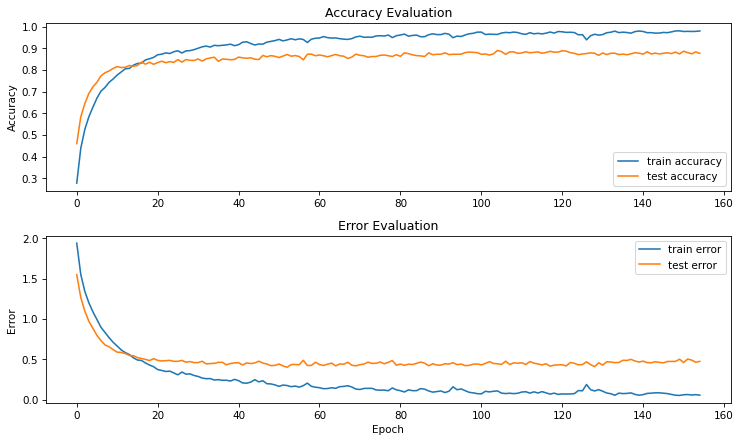

 Plots for Model 2


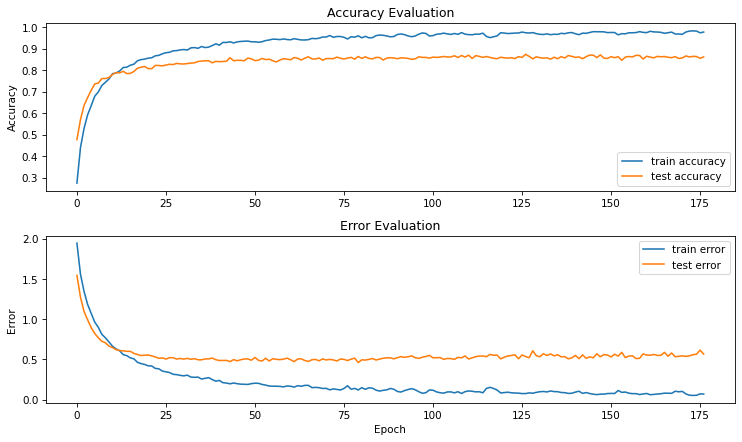

 Plots for Model 3


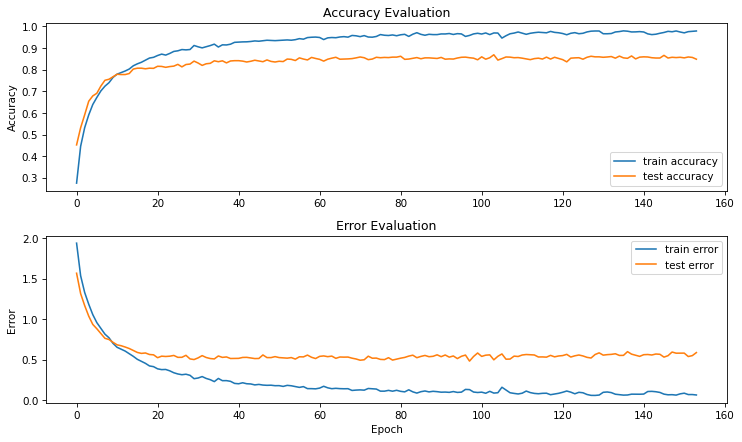

 Plots for Model 4


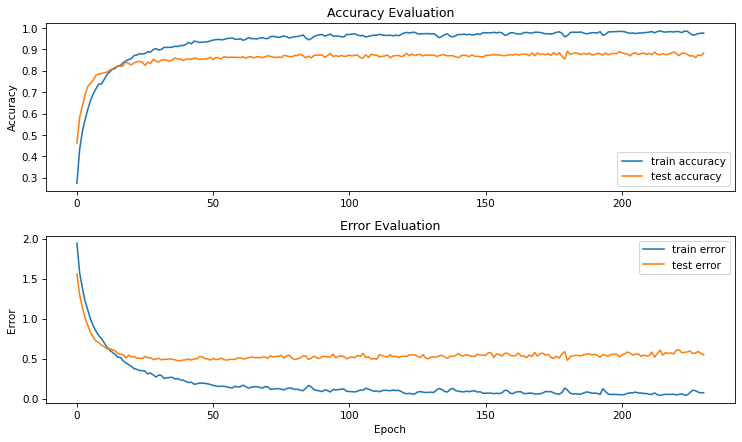

 Plots for Model 5


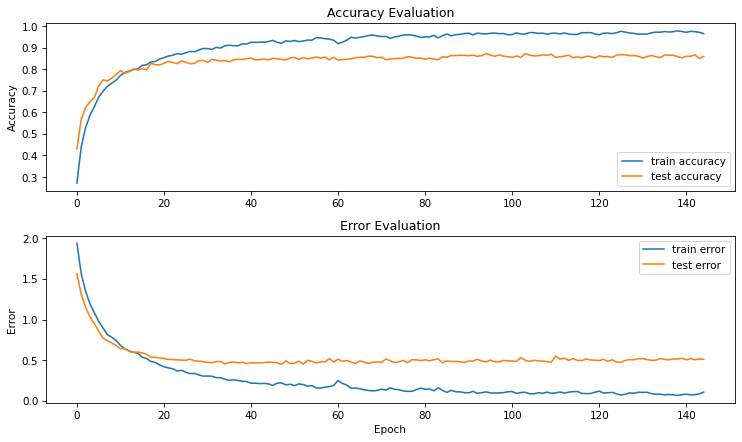

In [11]:
# plot accuracies and errors
kf.plot_histories()

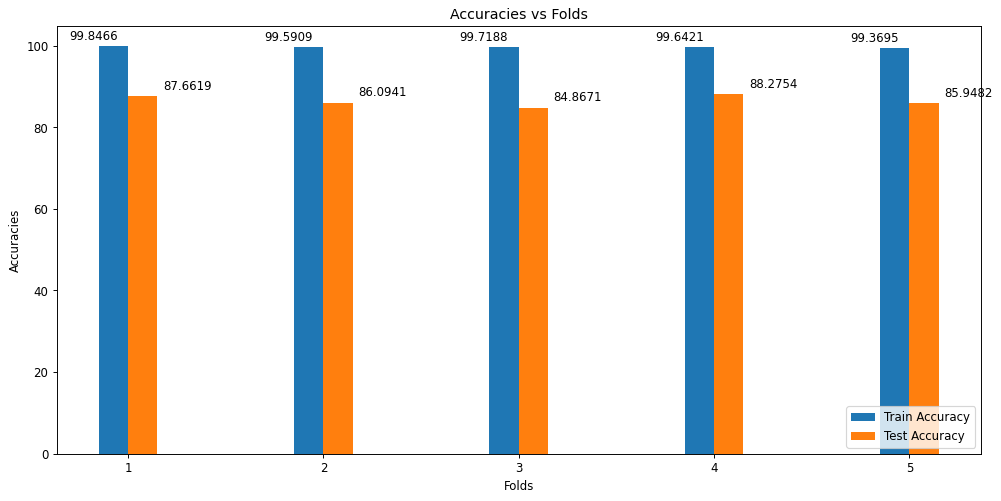

In [12]:
# accuracies of each fold
kf.plot_accuracies_vs_folds()

* Models are already saved, skip below.

In [ ]:
# save all folds (default path is for lstm)
kf.save_all_models(path="data_science/models/lstm_k_fold/saved_model_")

In [ ]:
# save best fold (here, fold 1)
kf.save_best_model(best_fold=1, path="data_science/models/lstm_k_fold/best_model")